In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import librosa, librosa.display
import soundfile as sf

#Created by Team 11
import audio_feature_extractor as afer
import dataset_creator as dc

In [2]:
afe=afer.audio_feature_extractor()
gd=afer.gender_detector()

In [3]:
dataset_creator=dc.dataset_creator("audio/dataset.csv","",afe,gd,"Undefined")
dataset_creator.generate_dataset()

audio\Tracee Ellis Ross - A woman's fury holds lifetimes of wisdom _ TED.wav


In [4]:
df=pd.read_csv("dataset.csv")
df=np.array(df)
clustering = KMeans(int(0.2*len(df))).fit(df)
identified_clusters= clustering.fit_predict(df)

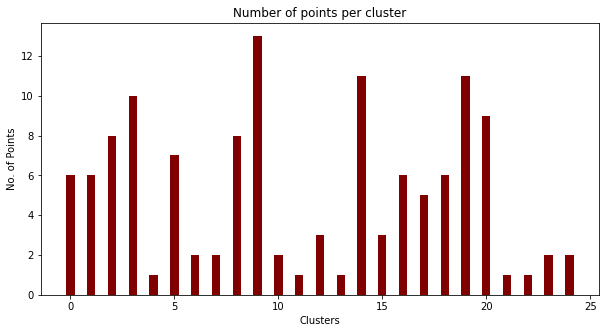

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = {}
for i in identified_clusters:
    try:
        data[i]+=1
    except:
        data[i]=1
clusters = list(data.keys())
values = list(data.values())

# thd=0
# factor = 0.7
# for i in values:
#     thd+=i**2
    
# thd=(thd/len(values))**0.5
# thd=int(thd*factor)
thd=np.percentile(values,75)

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(clusters, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Clusters")
plt.ylabel("No. of Points")
plt.title("Number of points per cluster")
plt.show()

In [6]:
summarized_cluster=[]
for i in clusters:
    if(data[i]>=thd):
        summarized_cluster.append(i)

In [7]:
identified_clusters

array([21, 11,  6, 12, 19,  5, 16,  2,  9,  2, 19,  1,  0, 20, 19,  9, 19,
       16,  5, 23, 24,  9,  3, 17, 16,  0,  0, 14,  9, 19,  8, 16,  9,  1,
       20,  5,  8, 19, 20, 14, 15, 20,  3,  2, 17, 23, 19, 20,  9,  2, 14,
        1,  8,  2, 15,  1,  3,  9,  5, 12, 14,  9, 14,  2,  2,  9, 19, 14,
       17, 14, 19,  8, 14,  5, 18, 20, 14,  7, 17,  9,  8,  0,  8, 17, 16,
        1, 14,  6, 16, 18,  5,  5, 20,  2,  9, 15,  8,  7, 24,  9,  9,  1,
       19, 10,  4, 20, 18,  0, 19,  8, 14, 18,  3,  3,  3,  3, 20, 18,  0,
        3, 12,  3,  3, 18, 10, 22, 13])

In [8]:
vector=[]
for i in identified_clusters:
    if(i in summarized_cluster):
        vector.append(1)
    else:
        vector.append(0)

In [9]:
signal_set=np.array([])

import pandas as pd
dataset=pd.read_csv("audio/dataset.csv")
names=dataset['Name']
genders=dataset['Label']
signaln = int(661794/6)
fmap_dataset={}

for j in range(len(names)):    
    name="audio\\"+names[j]+".wav"
    print(name)
    signal, sample_rate = librosa.load(name, sr=22050)#plot signal
    k=0
    for i in range(signaln*2,len(signal),signaln):
        if(vector[k]==1):
            signal_set=np.concatenate((signal_set,[signal[i:i+signaln]]),axis=None)
        k+=1
            

audio\Tracee Ellis Ross - A woman's fury holds lifetimes of wisdom _ TED.wav


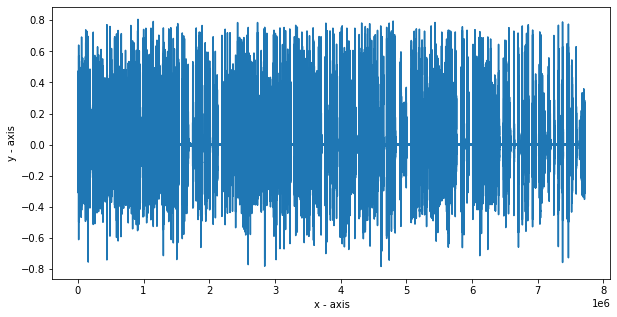

In [10]:
# importing the required module
import matplotlib.pyplot as plt
 
# x axis values
x=[]
for i in range(len(signal_set)):
    x.append(i+1)
# corresponding y axis values
y = signal_set
 
fig = plt.figure(figsize = (10, 5))
# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# function to show the plot
plt.show()

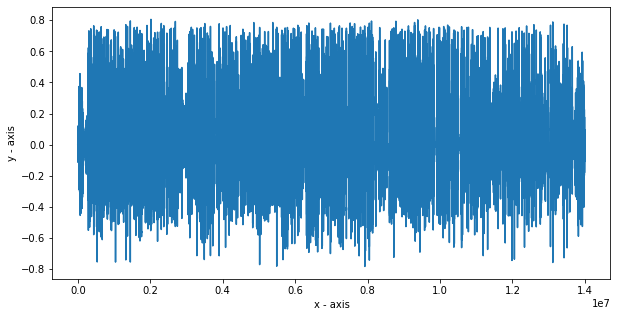

In [11]:
# importing the required module
import matplotlib.pyplot as plt
 
# x axis values
x=[]
for i in range(len(signal)):
    x.append(i+1)
# corresponding y axis values
y = signal

fig = plt.figure(figsize = (10, 5))
# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# function to show the plot
plt.show()

In [12]:
sf.write('stereo_file1.wav', signal_set, sample_rate, 'PCM_24')